# Task 4: Insights & Recommendations for Fintech App Customer Experience



Import libraries 

In [7]:
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(".."))

from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from scripts.Insight import identify_drivers_and_pain_points, map_rating_to_sentiment, compare_banks
from scripts.Recommendation import Recommendations
file_path = "/home/samrawit/Desktop/Banking_Application_Experience_Analysis/Data/processed/Clean_results.csv"

if os.path.exists(file_path):
    Cleaned = pd.read_csv(file_path)


In [3]:
Cleaned.head()

,Review,Rating,Date,Bank,Source,sentiment_label,sentiment_score
0,"""why don’t your atms support account-to-accoun...",4,2025-06-06,CBE,App,negative,0.996465
1,what is this app problem???,1,2025-06-05,CBE,App,negative,0.999623
2,the app is proactive and a good connections.,5,2025-06-05,CBE,App,positive,0.999868
3,i cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,App,negative,0.995335
4,good,4,2025-06-05,CBE,App,positive,0.999816


### Insights

In [4]:
Cleaned['sentiment_label'] = Cleaned['Rating'].apply(map_rating_to_sentiment)
print(Cleaned['sentiment_label'].value_counts()) 


Insights = identify_drivers_and_pain_points(Cleaned)
Insights



sentiment_label
positive    803
negative    385
neutral      75
Name: count, dtype: int64


{'CBE': {'drivers': ['app', 'good', 'best', 'cbe', 'bank'],
  'painpoints': ['app', 'screenshot', 'update', 'good', 'bank']},
 'BOA': {'drivers': ['app', 'good', 'bank', 'boa', 'best'],
  'painpoints': ['app', 'bank', 'work', 'mobile', 'banking']},
 'Dashen': {'drivers': ['app', 'dashen', 'super', 'banking', 'bank'],
  'painpoints': ['app', 'good', 'slow', 'working', 'work']}}

In [5]:
Bank_comparision= compare_banks(Cleaned, bank_col='Bank', sentiment_col='sentiment_label')
Bank_comparision

sentiment_label,negative,neutral,positive
Bank,,,
BOA,261,35,175
CBE,76,28,310
Dashen,48,12,318


## Recommendations

In [6]:
recommendations = Recommendations(Insights)
for bank, recs in recommendations.items():
    print(f"Recommendation for {bank}:")
    for rec in recs[:2]:  # At least 2 improvements
        print(" -", rec)
    print()

Recommendation for CBE:
 - Address customer concern: 'app' (e.g., improve this area)
 - Address customer concern: 'screenshot' (e.g., improve this area)

Recommendation for BOA:
 - Address customer concern: 'app' (e.g., improve this area)
 - Address customer concern: 'bank' (e.g., improve this area)

Recommendation for Dashen:
 - Address customer concern: 'app' (e.g., improve this area)
 - Address customer concern: 'good' (e.g., improve this area)



## Visualization 

Sentiment trends over time

In [9]:
Cleaned.head()

,Review,Rating,Date,Bank,Source,sentiment_label,sentiment_score
0,"""why don’t your atms support account-to-accoun...",4,2025-06-06,CBE,App,negative,0.996465
1,what is this app problem???,1,2025-06-05,CBE,App,negative,0.999623
2,the app is proactive and a good connections.,5,2025-06-05,CBE,App,positive,0.999868
3,i cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,App,negative,0.995335
4,good,4,2025-06-05,CBE,App,positive,0.999816


In [18]:
file_path = "/home/samrawit/Desktop/Banking_Application_Experience_Analysis/Data/processed/Clean_results.csv"

if os.path.exists(file_path):
    Cleaned = pd.read_csv(file_path)

/tmp/ipykernel_47597/3769643138.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend = Cleaned.groupby([bank_col, pd.Grouper(key=date_col, freq='M')])[sentiment_col].value_counts().unstack().fillna(0)


<Figure size 1000x600 with 0 Axes>

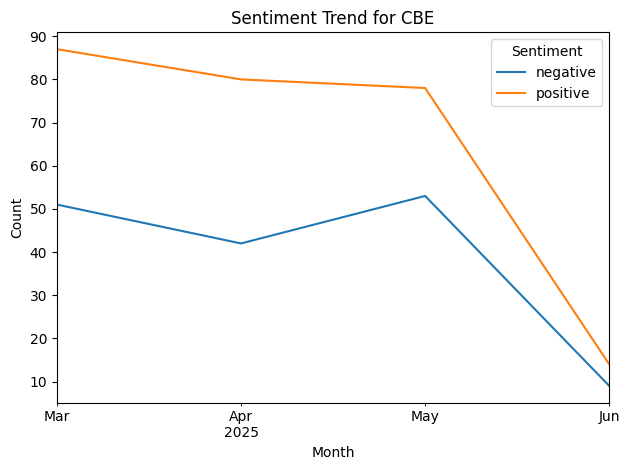

<Figure size 1000x600 with 0 Axes>

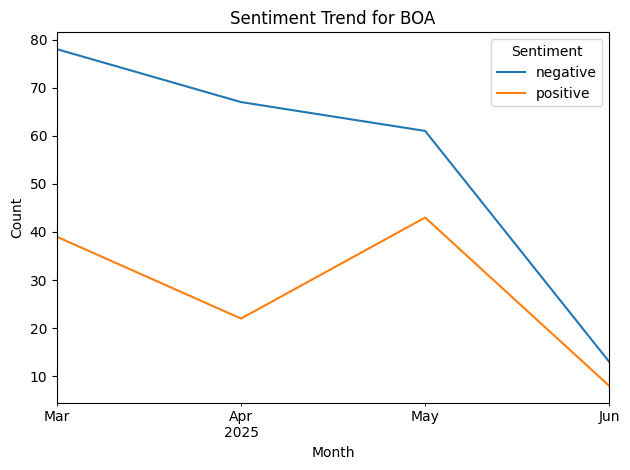

<Figure size 1000x600 with 0 Axes>

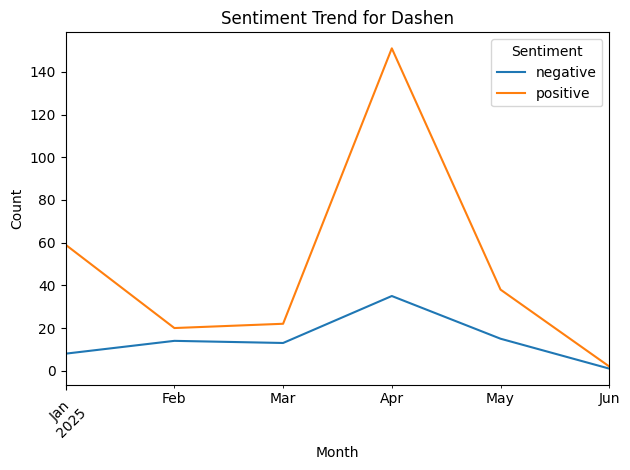

In [19]:

date_col = 'Date'
bank_col = 'Bank'
sentiment_col = 'sentiment_label'

Cleaned[date_col] = pd.to_datetime(Cleaned[date_col])

# Group the data by bank and month, then count sentiment values
trend = Cleaned.groupby([bank_col, pd.Grouper(key=date_col, freq='M')])[sentiment_col].value_counts().unstack().fillna(0)

# Plotting
for bank in Cleaned[bank_col].unique():
    plt.figure(figsize=(10, 6))  # Set the figure size
    trend.loc[bank].plot(kind='line', title=f'Sentiment Trend for {bank}')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

## Rating distributions

In [23]:
def rating_distribution_plot(Cleaned: pd.DataFrame, rating_col: str = 'Rating', bank_col: str = 'Bank'):
    # Group the data by bank and calculate the mean rating for each bank
    rating_trend = Cleaned.groupby(bank_col)[rating_col].mean().reset_index()
    
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.barplot(data=rating_trend, x=bank_col, y=rating_col, palette='viridis')
    plt.title('Average Rating Distribution by Bank')
    plt.xlabel('Bank')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

/tmp/ipykernel_47597/1930429742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_trend, x=bank_col, y=rating_col, palette='viridis')


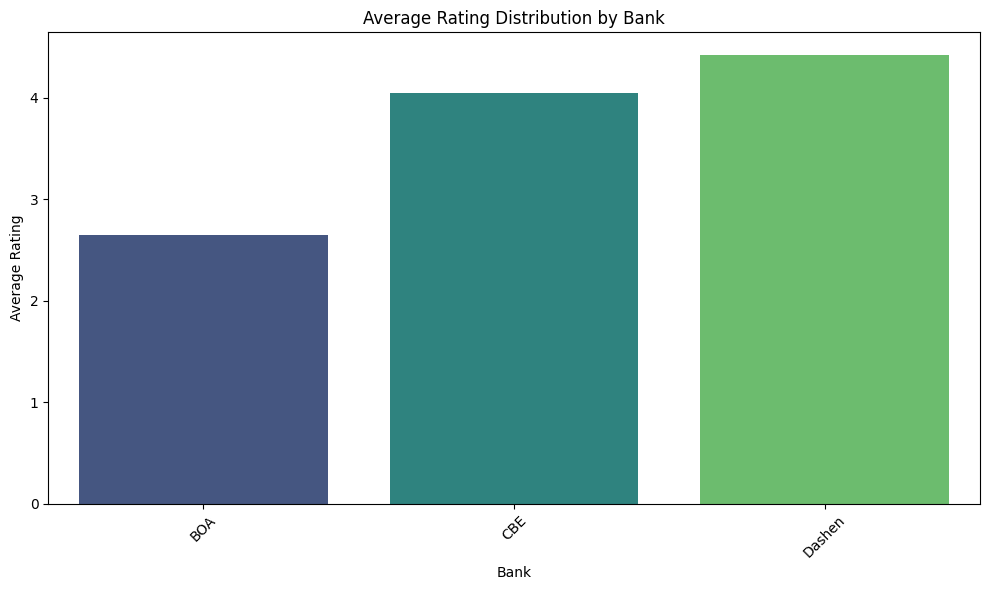

In [24]:
rating_distribution_plot(Cleaned)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from typing import Optional

## Keyword Cloud 

In [28]:
def keyword_cloud(df: pd.DataFrame, text_col: str = 'Review', bank: Optional[str] = None, bank_col: str = 'Bank'):
    
    texts = Cleaned[Cleaned[bank_col] == bank][text_col] if bank else Cleaned[text_col]

    combined_text = ' '.join(texts.astype(str))

    wc = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')  
    plt.title(f'Keyword Cloud {"for " + bank if bank else "(All Banks)"}')
    plt.show()

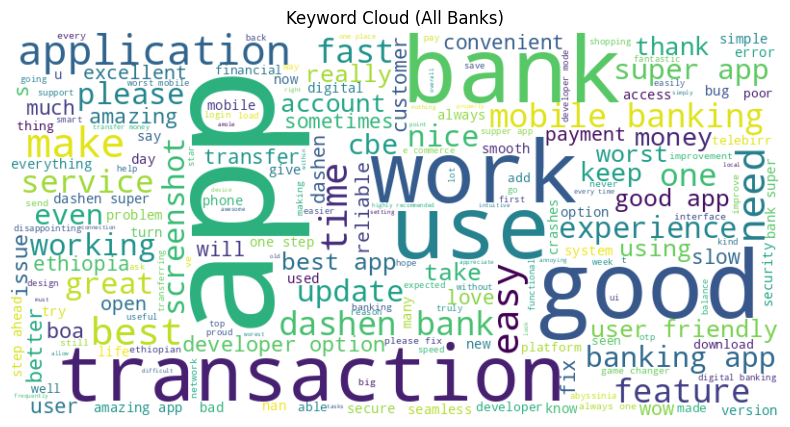

In [30]:
keyword_cloud(Cleaned)